# JN for extracting spin Hall angle

### This Jupyter notebook extract all relevant information from the first and second harmonic hall voltage measurements and outputs a spin Hall angle.


#### There are 5 sections - more detail on these can be found in the README.md

#### Sample A: Py/Pt

# SECTION 1

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math as m
from processing import read_csv

In [2]:
#import data - each df is  repeat
df_1 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_1/repeat_1.csv')
df_2 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_2/repeat_2.csv')
df_3 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_3/repeat_3.csv')
df_4 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_4/repeat_4.csv')
df_5 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_5/repeat_5.csv')
df_6 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_6/repeat_6.csv')
df_7 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_7/repeat_7.csv')
df_8 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_8/repeat_8.csv')
df_9 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_9/repeat_9.csv')
df_10 = read_csv.read_data_from_chosen_csv('./data/selected_for_analysis/A_ 22_03_2022/repeat_10/repeat_10.csv')

#Fill in all the df
data_array = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]   #input n of data frames

angle = 0
magnet_current = 1
r2w = 2
r2werr = 3
theta2w = 4
r1w = 5
r1werr = 6
theta1w = 7
x2 = 8
y2 = 9
x1 = 10
y1 = 11
i_source = 12
f_source = 13

#Assigning string names to each value, corresponding to the values above. 
array_of_names = ['angle', 
                  'magnet current', 
                  'r2w', 
                  'r2werr', 
                  'theta2w', 
                  'r1w', 
                  'r1werr', 
                  'theta1w', 
                  'x2', 
                  'y2', 
                  'x1', 
                  'y1', 
                  'i_source', 
                  'f_source']


In [3]:
#print some config info for each df

data_frame_range = range(len(data_array))

def search_for_data_frame(data_frame_range):
    #up to 10 data_frames
    array = np.zeros(len(data_frame_range), dtype=int)
    for i in data_frame_range:
        if f'df_{i+1}' in globals():
            array[i] = 1
        
    return array
        
        
array = search_for_data_frame(data_frame_range)

for i in data_frame_range:
    if array[i] == 1:
        specific_data = data_array[i]
        print(f'df_{i+1} configuration \n------------------')
        #Source current mA
        print(f'source current:')
        print(specific_data[i_source][1])
        #Frequency Hz
        print(f'source frequency:')
        print(specific_data[f_source][1])
        #Magnet current - CAUTION>>>if complete data sample it will only be reading for first trial!
        print(f'magnet current:')
        print(specific_data[magnet_current][1])
        
        print('\n')
        
        


df_1 configuration 
------------------
source current:
15.0
source frequency:
2005.0
magnet current:
0.1


df_2 configuration 
------------------
source current:
15.0
source frequency:
2005.0
magnet current:
0.2


df_3 configuration 
------------------
source current:
15.0
source frequency:
2005.0
magnet current:
0.3


df_4 configuration 
------------------
source current:
15.0
source frequency:
2005.0
magnet current:
0.4


df_5 configuration 
------------------
source current:
15.0
source frequency:
2005.0
magnet current:
0.5


df_6 configuration 
------------------
source current:
15.0
source frequency:
2005.0
magnet current:
0.6


df_7 configuration 
------------------
source current:
15.0
source frequency:
2005.0
magnet current:
0.7


df_8 configuration 
------------------
source current:
15.0
source frequency:
2005.0
magnet current:
0.8


df_9 configuration 
------------------
source current:
15.0
source frequency:
2005.0
magnet current:
0.9


df_10 configuration 
----------------

# SECTION 2

### Extracting R_PHE from each df

df_1
Magnet current: 0.1 A
a: 0.08294151304648703
b: -0.06027828988570803
c: -0.0004466085737728629


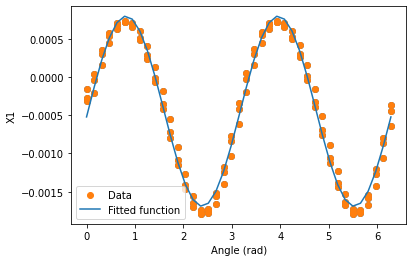

df_2
Magnet current: 0.2 A
a: 0.08343794757987695
b: -0.06483188339331653
c: -0.0004813805221496393


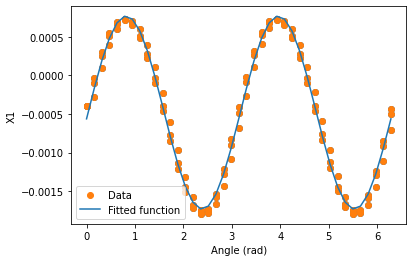

df_3
Magnet current: 0.3 A
a: 0.08360599536391233
b: -0.06209770746715826
c: -0.0004928771787979886


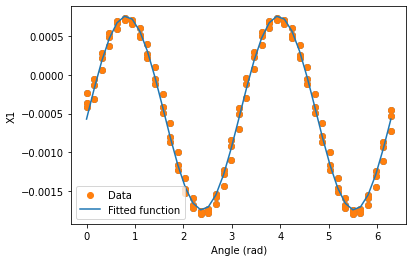

df_4
Magnet current: 0.4 A
a: 0.08370532335777338
b: -0.06215252437089181
c: -0.0005002698164715788


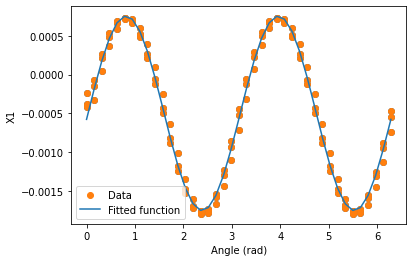

df_5
Magnet current: 0.5 A
a: 0.08379011486120647
b: -0.06222764794083823
c: -0.0005048846310863542


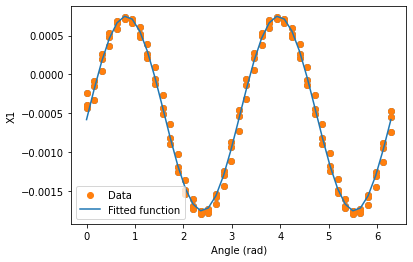

df_6
Magnet current: 0.6 A
a: 0.08383485437933116
b: -0.06227584580149475
c: -0.0005081563621032387


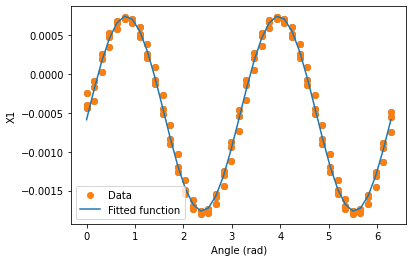

df_7
Magnet current: 0.7 A
a: 0.08389828899461987
b: -0.06231382656843694
c: -0.0005105051095099411


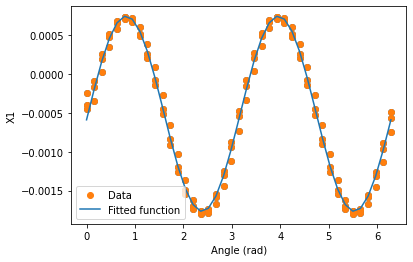

df_8
Magnet current: 0.8 A
a: 0.0839528633252974
b: -0.06238880646833912
c: -0.0005123951148058249


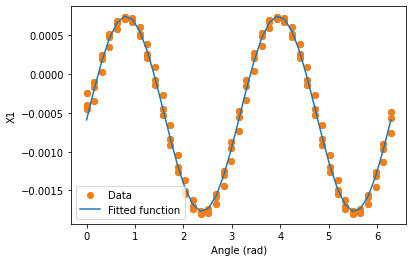

df_9
Magnet current: 0.9 A
a: 0.08399374631266321
b: -0.06244063762115762
c: -0.0005138269657806464


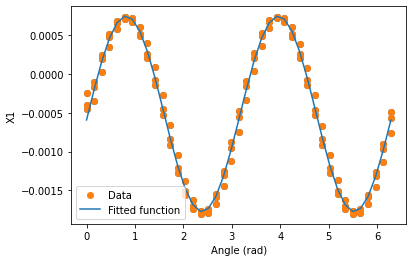

df_10
Magnet current: 1.0 A
a: 0.0840322928072484
b: -0.06254809704411522
c: -0.0005149663536140987


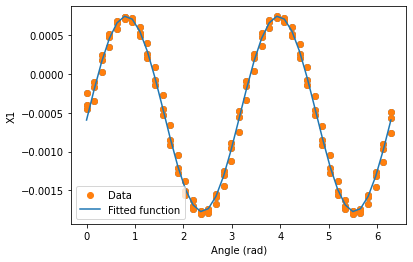

In [4]:
#Fitting to a sine curve
number_of_dataframes = len(data_array)

R_PHE_array = np.zeros(number_of_dataframes)
offset_array = np.zeros(number_of_dataframes)

for i in range(R_PHE_array.size):
    peak_current = data_array[i][i_source][1] * 10**-3      #Amps
    df = data_array[i]
    print(f'df_{i+1}')
    print(f'Magnet current: {data_array[i][magnet_current][0]} A')
    V_w = df[x1].values
    phi = df[angle].values
    
    phi = np.radians(phi)

    plt.scatter(phi, V_w)

    from scipy import optimize

    def test_func(x, a, b, c):
        return peak_current * a * np.sin((2 * x) + b) + c

    params, params_covariance = optimize.curve_fit(test_func, phi, V_w)

    print(f'a: {params[0]}')
    print(f'b: {params[1]}')
    print(f'c: {params[2]}')
    R_PHE_array[i] = params[0]
    offset_array[i] = params[1]

    

    plt.scatter(phi, V_w, label='Data')
    plt.plot(phi, test_func(phi, params[0], params[1], params[2]),
             label='Fitted function')
    plt.xlabel('Angle (rad)')
    plt.ylabel('X1')

    corr = np.corrcoef(V_w, test_func(phi, params[0], params[1], params[2]))
    
    #Uncomment next line for r squared
    #print(corr**2)
    plt.legend(loc='best')

    plt.show()
    


R_PHE array 
 [0.08294151 0.08343795 0.083606   0.08370532 0.08379011 0.08383485
 0.08389829 0.08395286 0.08399375 0.08403229]
R_PHE average is: 0.08371929400284163
ext: ± 0.0005453898803806853


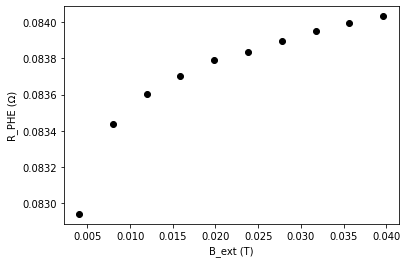

In [5]:
print(f'R_PHE array \n {R_PHE_array}')

B_ext = []

a = 39.60203463203462
b = 0.052166666666667146

#B_ext
for i in range(number_of_dataframes):
    x = data_array[i][magnet_current][1]
    y = a * x + b
    y = y*10**-3
    B_ext.append(y)

for i in range(number_of_dataframes):
    plt.scatter(B_ext[i], R_PHE_array[i], color='black')
    plt.xlabel('B_ext (T)')
    plt.ylabel('R_PHE (Ω)')

print(f'R_PHE average is: {np.average(R_PHE_array)}')
print(f'ext: ± {(R_PHE_array.max() - R_PHE_array.min())/2}')




### Solve for angle offset for each df


In [6]:
raw_angles_array = []
raw_x2_array = []

corrected_angles_array = []
phase_array = np.zeros(len(data_array)) #1 means positive phase change and -1 means negative

for i in range(len(data_array)):
    print(f'df{i+1}')
    b_rad = offset_array[i]/2
    print(f'phase difference is {b_rad} rad')
    b_deg = m.degrees(b_rad)
    print(f'phase difference is {b_deg} deg \n')
    
    if b_rad < 0:
        phase_array[i] = -1
    elif b_rad > 0:
        phase_array[i] = 1
    
    raw_angles = data_array[i][angle].values
    raw_x2 = data_array[i][x2].values

    corrected_angles = raw_angles+b_deg
    
    raw_angles_array.append(raw_angles)
    raw_x2_array.append(raw_x2)
    corrected_angles_array.append(corrected_angles)


df1
phase difference is -0.030139144942854013 rad
phase difference is -1.7268458033585936 deg 

df2
phase difference is -0.03241594169665826 rad
phase difference is -1.8572966481606634 deg 

df3
phase difference is -0.03104885373357913 rad
phase difference is -1.7789682776530926 deg 

df4
phase difference is -0.031076262185445905 rad
phase difference is -1.7805386662680465 deg 

df5
phase difference is -0.031113823970419115 rad
phase difference is -1.7826907980179894 deg 

df6
phase difference is -0.031137922900747374 rad
phase difference is -1.7840715650165784 deg 

df7
phase difference is -0.03115691328421847 rad
phase difference is -1.7851596338408071 deg 

df8
phase difference is -0.03119440323416956 rad
phase difference is -1.7873076497471614 deg 

df9
phase difference is -0.03122031881057881 rad
phase difference is -1.78879250289906 deg 

df10
phase difference is -0.03127404852205761 rad
phase difference is -1.791870988601251 deg 



#### Visualise all plots of raw data with offset data

Magnet current of 0.1


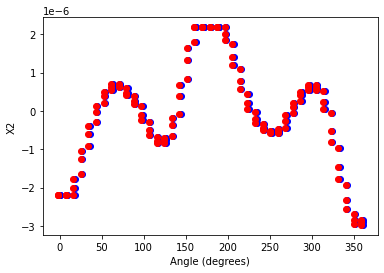

Magnet current of 0.2


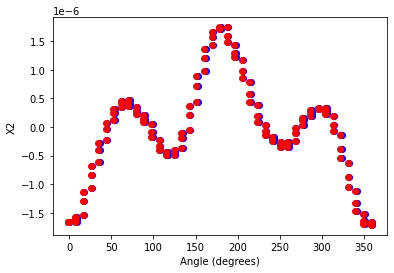

Magnet current of 0.3


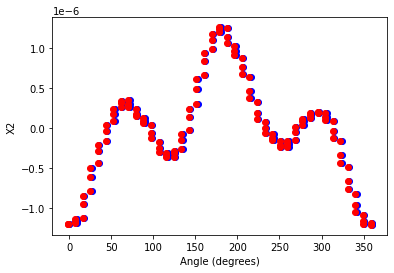

Magnet current of 0.4


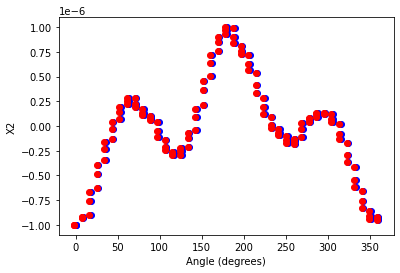

Magnet current of 0.5


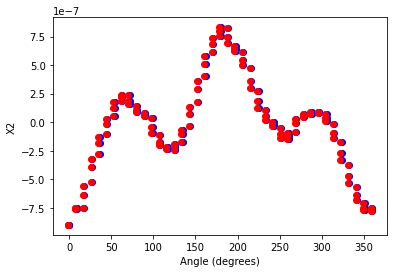

Magnet current of 0.6


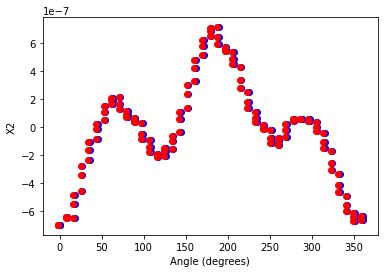

Magnet current of 0.7


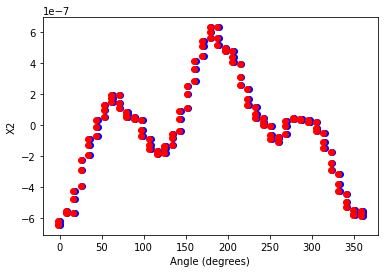

Magnet current of 0.8


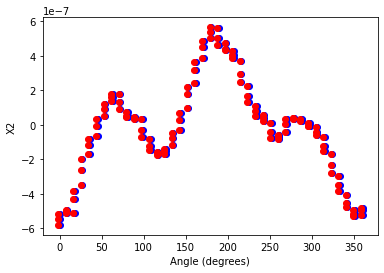

Magnet current of 0.9


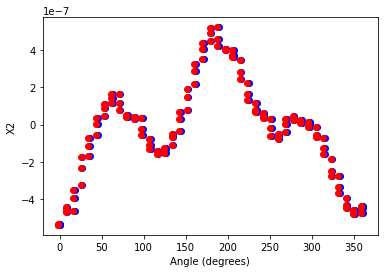

Magnet current of 1.0


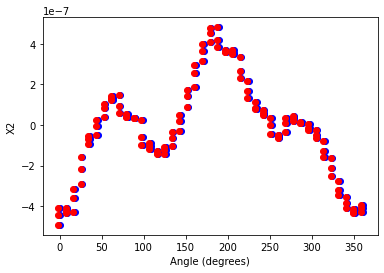

In [7]:
number_of_dataframes = len(data_array)

#Accounting for pre-amp gain
for i in range(number_of_dataframes): 
    raw_x2_array[i] = raw_x2_array[i]/100

for i in range(number_of_dataframes):
    print(f'Magnet current of {data_array[i][magnet_current][1]}')
    plt.scatter(raw_angles_array[i], raw_x2_array[i], color='blue')
    plt.scatter(corrected_angles_array[i], raw_x2_array[i], color='red')
    plt.xlabel('Angle (degrees)')
    plt.ylabel('X2')
    plt.show()



#### This next section is for applying any changes required for individual data sets

In [8]:
#OPTIONAL: Input any changes...

#### Changes section DONE

# SECTION 3

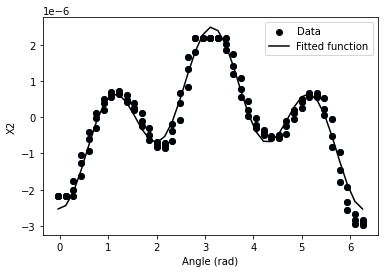

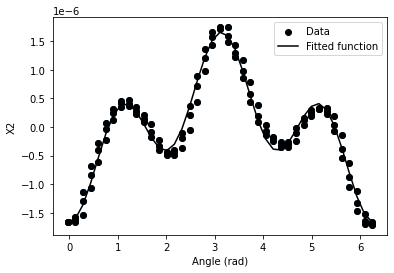

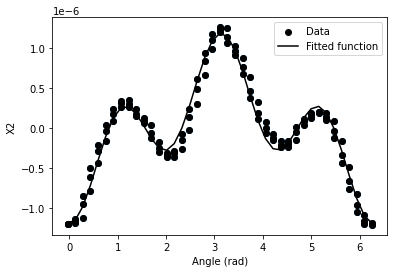

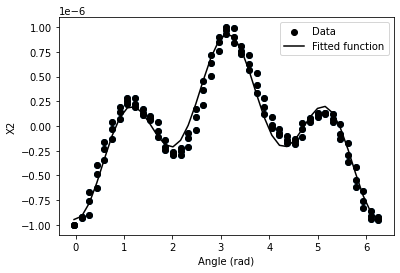

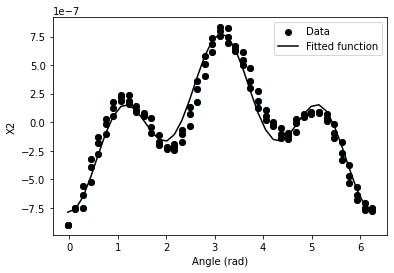

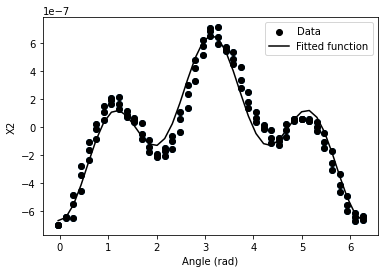

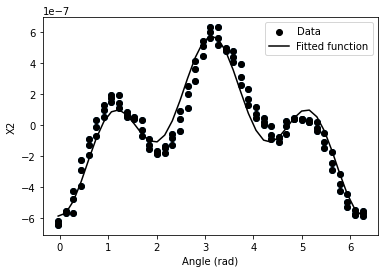

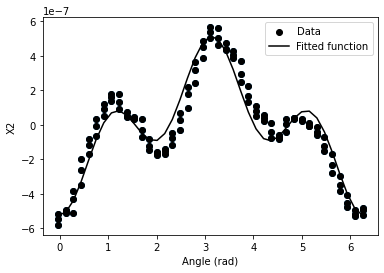

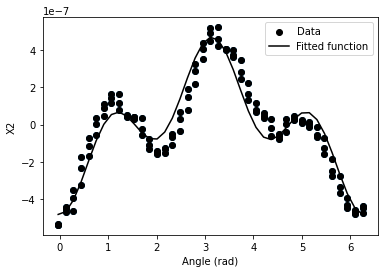

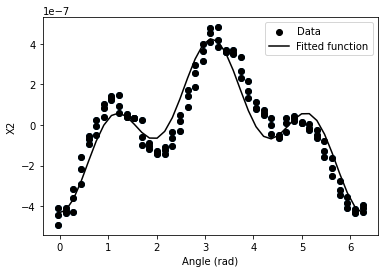

In [9]:
#Fitting to a V2w with corrected
rms_factor = 0.7
a_array = []
b_array = []
c_array = []

for i in range(number_of_dataframes):

    peak_current = data_array[i][i_source][1] * 10**-3     #Amps

    phi = np.radians(corrected_angles_array[i]) 

    plt.scatter(phi, raw_x2_array[i])

    from scipy import optimize

    def test_func(x, a, b, c):
        return ((a * np.cos(2 * x)) + b) * rms_factor * peak_current * np.cos(x)+c

    params, params_covariance = optimize.curve_fit(test_func, phi, raw_x2_array[i])

    a_array.append(params[0])
    b_array.append(params[1])
    c_array.append(params[2])



    plt.scatter(phi, raw_x2_array[i], label='Data', color='black')
    plt.plot(phi, test_func(phi, params[0], params[1], params[2]),
             label='Fitted function', color='black')
    plt.xlabel('Angle (rad)')
    plt.ylabel('X2')
    

    
    plt.legend(loc='best')

    plt.show()

#Uncomment any of the following lines to visualise:
#print(a_array)
#print(b_array)
#print(c_array)

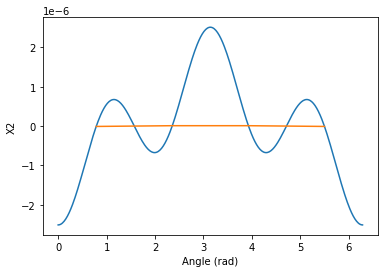

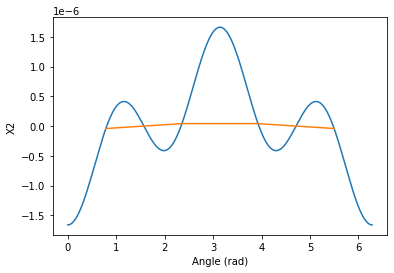

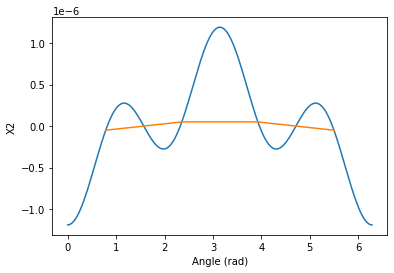

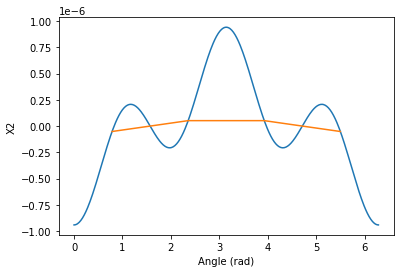

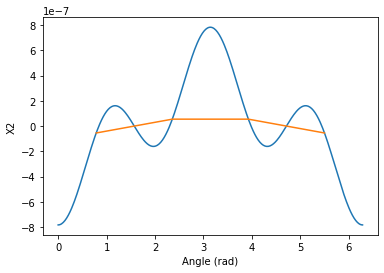

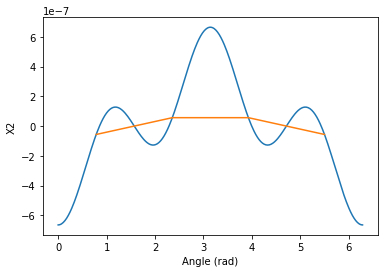

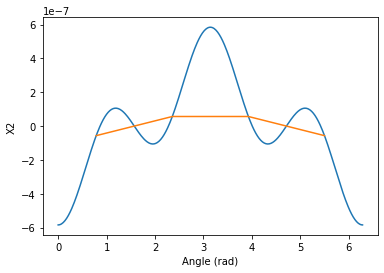

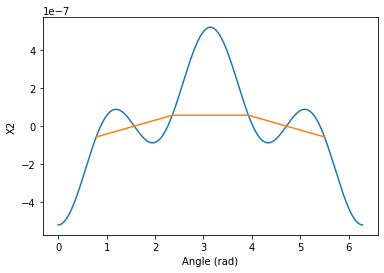

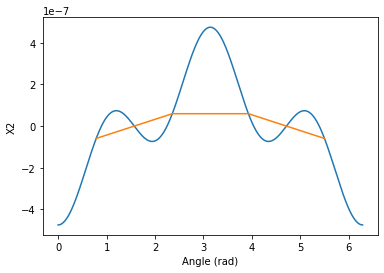

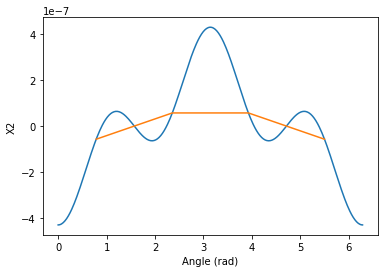

Text(0.5, 0, 'Angle (rad)')

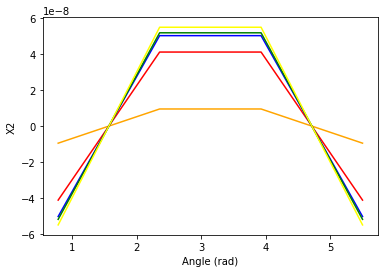

In [10]:
## Mark points where v2w is equal to 45, 135, 225, 315
v2w_at_x_array = []

#NOTE: c_array gets removed here in order to center the fit around x=0

for i in range(number_of_dataframes):
    x = np.linspace(0, 2*np.pi, 360)
    v2w = ((a_array[i] * np.cos(2 * x)) + b_array[i]) * rms_factor * peak_current * np.cos(x) #Remove c_array to center around 0
    plt.plot(x, v2w)

    #calculate v2w at 45, 135, 225, 315 deg
    x = [np.radians(45), np.radians(135), np.radians(225), np.radians(315)]
    v2w_at_x = np.zeros(4)
    for j in range(len(x)):
        v2w = ((a_array[i] * np.cos(2 * x[j])) + b_array[i]) *rms_factor * peak_current * np.cos(x[j])  #remove c_array for ease of visualisation
        v2w_at_x[j] = v2w
    
    v2w_at_x_array.append(v2w_at_x)
    plt.plot(x, v2w_at_x)
    plt.xlabel('Angle (rad)')
    plt.ylabel('X2')
    plt.show()
#Uncomment any of the following lines to visualise:
#print(v2w_at_x_array[0])
#print(v2w_at_x_array[1])
#print(v2w_at_x_array[2])
#print(v2w_at_x_array[3])
#print(v2w_at_x_array[4])

#Plot all of them together with assigned colours:
x = [np.radians(45), np.radians(135), np.radians(225), np.radians(315)]
plt.plot(x, v2w_at_x_array[0], color='orange')
plt.plot(x, v2w_at_x_array[1], color='red')
plt.plot(x, v2w_at_x_array[2], color='blue')
plt.plot(x, v2w_at_x_array[3], color='green')
plt.plot(x, v2w_at_x_array[4], color='yellow')
plt.ylabel('X2')
plt.xlabel('Angle (rad)')

In [11]:
#Fitting a cos curve to the 4 extracted data points
#Uncomment all the plt lines if you'd like to visualise

cos_factor_array = []

for i in range(number_of_dataframes):
    
    phi = [np.radians(45), np.radians(135), np.radians(225), np.radians(315)]

    #plt.scatter(phi, v2w_at_x_array[i])

    from scipy import optimize

    def test_func(x, cos_factor):
        return cos_factor * np.cos(x)

    params, params_covariance = optimize.curve_fit(test_func, phi, v2w_at_x_array[i])

    cos_factor_array.append(params[0])
    
    #plt.scatter(phi, v2w_at_x_array[i], label='Data')
    #plt.plot(phi, test_func(phi, params[0]),
    #         label='Fitted function')

    #plt.ylabel('X2')
    #plt.xlabel('Angle (rad)')
    
    #plt.legend(loc='best')

    #plt.show()

print(f'cos factor array {cos_factor_array}')
    

cos factor array [-1.340146655116916e-08, -5.80241123102878e-08, -7.087967490784526e-08, -7.311084949239787e-08, -7.746791009106777e-08, -7.973938915653515e-08, -8.000785469008126e-08, -8.062497673654495e-08, -8.408650968295009e-08, -8.096405243348471e-08]


Max cos contribution value is 1.3400953417622786e-08
max 2.512156824641182e-06
min -2.5126357861747203e-06
max y 1.3400953417622786e-08
min y -1.340146655116916e-08


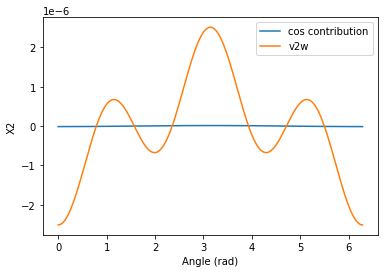

Max cos contribution value is 5.8021890604296796e-08
max 1.6627073862434977e-06
min -1.663016864539346e-06
max y 5.8021890604296796e-08
min y -5.80241123102878e-08


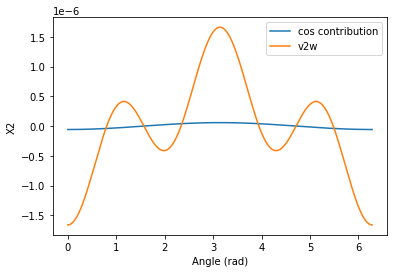

Max cos contribution value is 7.087696097061963e-08
max 1.1926242208930821e-06
min -1.192841720991647e-06
max y 7.087696097061963e-08
min y -7.087967490784526e-08


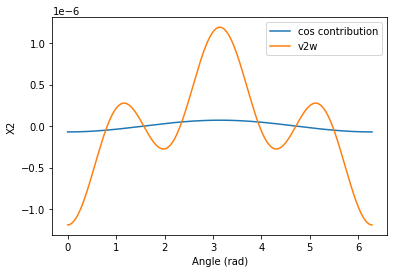

Max cos contribution value is 7.31080501249305e-08
max 9.408296063690802e-07
min -9.40998552415783e-07
max y 7.31080501249305e-08
min y -7.311084949239787e-08


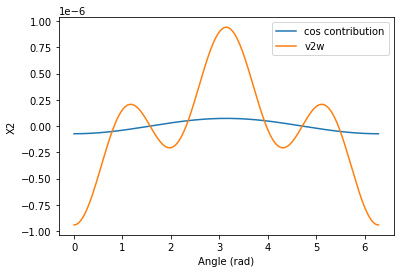

Max cos contribution value is 7.746494389454865e-08
max 7.835300701906702e-07
min -7.836682299584608e-07
max y 7.746494389454865e-08
min y -7.746791009106777e-08


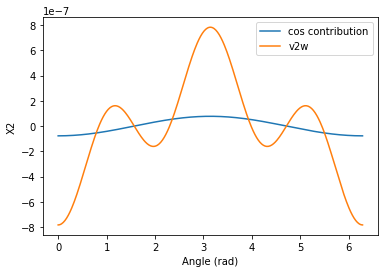

Max cos contribution value is 7.97363359865416e-08
max 6.641365247192175e-07
min -6.642514757094321e-07
max y 7.97363359865416e-08
min y -7.973938915653515e-08


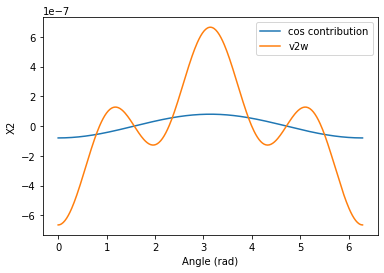

Max cos contribution value is 8.000479124071487e-08
max 5.839442257628745e-07
min -5.840437808379001e-07
max y 8.000479124071487e-08
min y -8.000785469008126e-08


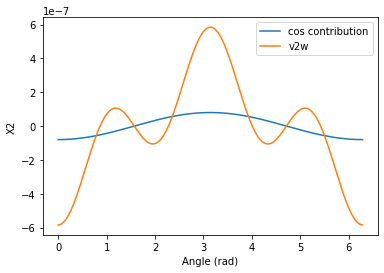

Max cos contribution value is 8.062188965797178e-08
max 5.196963397372056e-07
min -5.197834984413973e-07
max y 8.062188965797178e-08
min y -8.062497673654495e-08


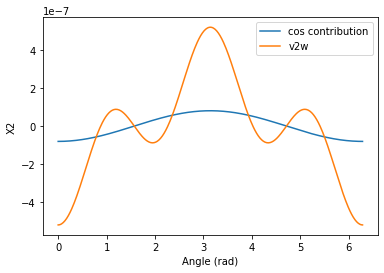

Max cos contribution value is 8.408329006450377e-08
max 4.7489113026634915e-07
min -4.7496917967829473e-07
max y 8.408329006450377e-08
min y -8.408650968295009e-08


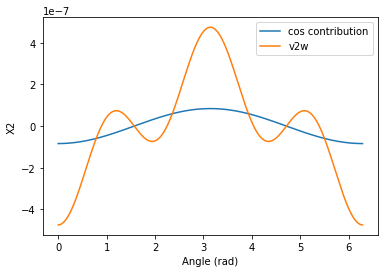

Max cos contribution value is 8.096095237192091e-08
max 4.3085953901567117e-07
min -4.3092963578582387e-07
max y 8.096095237192091e-08
min y -8.096405243348471e-08


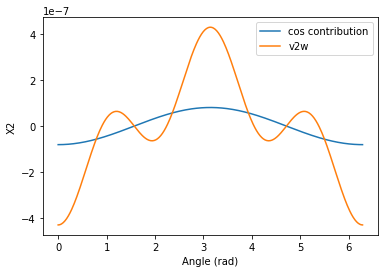

In [12]:
for i in range(number_of_dataframes):
    x = np.linspace(0, 2*np.pi, 360)
    y = cos_factor_array[i] * np.cos(x)
    print(f'Max cos contribution value is {y.max()}')
    plt.plot(x, y, label='cos contribution')
    x = np.linspace(0, 2*np.pi, 360)
    v2w = ((a_array[i] * np.cos(2 * x)) + b_array[i]) * rms_factor * peak_current * np.cos(x)
    print(f'max {v2w.max()}')
    print(f'min {v2w.min()}')
    print(f'max y {y.max()}')
    print(f'min y {y.min()}')
    plt.plot(x, v2w, label='v2w')
    plt.xlabel('Angle (rad)')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.show()

In [13]:
x = np.linspace(0, 2*np.pi, 360)
FL = np.empty((number_of_dataframes, 360))
for i in range(number_of_dataframes):

    count = 0
    for x_val in x:
        y_val = cos_factor_array[i] * np.cos(x_val)
        v2w_val = ((a_array[i] * np.cos(2 * x_val)) + b_array[i]) * rms_factor * peak_current * np.cos(x_val)

        FL[i][count] = v2w_val - y_val

        count += 1


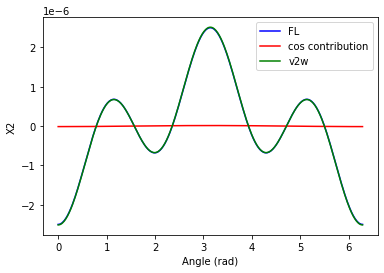

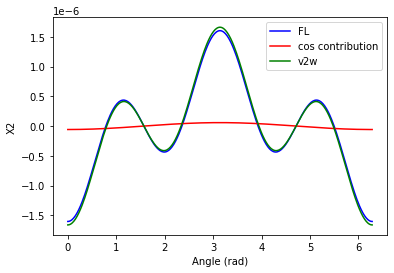

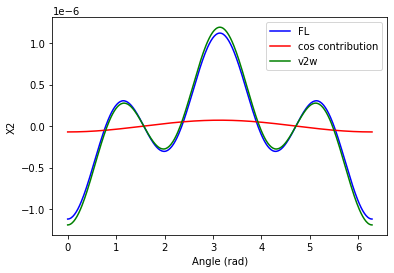

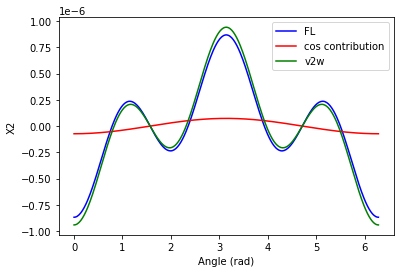

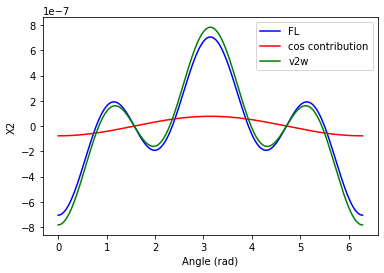

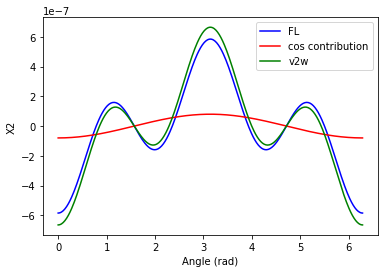

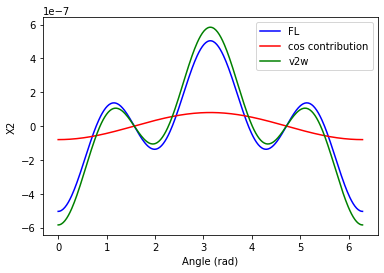

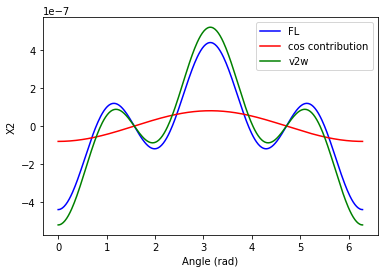

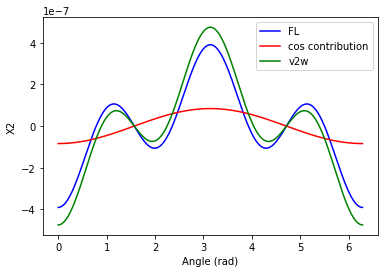

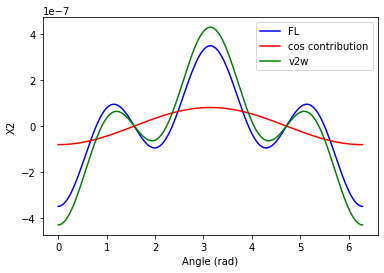

In [14]:
for i in range(number_of_dataframes):
    v2w = ((a_array[i] * np.cos(2 * x)) + b_array[i]) * rms_factor * peak_current * np.cos(x)
    cos_contribution = cos_factor_array[i] * np.cos(x)
    
    plt.plot(x, FL[i], color='blue', label='FL')
    plt.plot(x, cos_contribution, color='red', label='cos contribution')
    plt.plot(x, v2w, color='green', label='v2w')
    plt.xlabel('Angle (rad)')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.show()

    

# SECTION 4 a)

### Plot cos contribution vs 1/Beff

### Calculate B_eff and B_ext in T

In [15]:
#magnet calibration import fronm magnet JN
B_ext = []
B_eff = []
a = 39.60203463203462
b = 0.052166666666667146

#B_ext
for i in range(number_of_dataframes):
    x = data_array[i][magnet_current][1]
    y = a * x + b
    y = y*10**-3
    B_ext.append(y)
    
#B_eff
for i in range(number_of_dataframes):
    x = data_array[i][magnet_current][1]
    y = a * x + b
    applied = y*10**-3
    mu0 = 1 #4 * np.pi * 10**-7
    Ms = 1 #Tesla, value sourced from online google 'magnetisation of permalloy'
    
    eff = applied + (mu0 * Ms)
    
    B_eff.append(eff)

frac_B_ext = [1 / x for x in B_ext]
frac_B_eff = [1 / x for x in B_eff]


[-1.340146655116916e-08, -5.80241123102878e-08, -7.087967490784526e-08, -7.311084949239787e-08, -7.746791009106777e-08, -7.973938915653515e-08, -8.000785469008126e-08, -8.062497673654495e-08, -8.408650968295009e-08, -8.096405243348471e-08]
[1.340146655116916e-08, 5.80241123102878e-08, 7.087967490784526e-08, 7.311084949239787e-08, 7.746791009106777e-08, 7.973938915653515e-08, 8.000785469008126e-08, 8.062497673654495e-08, 8.408650968295009e-08, 8.096405243348471e-08]


Text(0, 0.5, 'X2 of cos contribution')

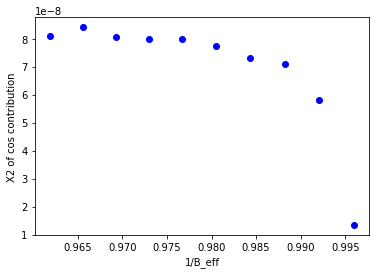

In [16]:
print(cos_factor_array)
if cos_factor_array[0] < 0:
    cos_factor_array = [-1 * x for x in cos_factor_array]
print(cos_factor_array)

plt.scatter(frac_B_eff, cos_factor_array, color='blue')
plt.xlabel('1/B_eff')
plt.ylabel('X2 of cos contribution')

### Next apply a straight line fit to all the data

-1.3869806370214346e-06
1.4273442426470576e-06


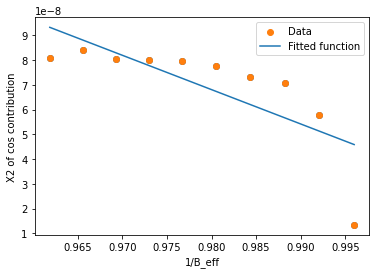

In [17]:
#Apply straight line fit through all data

frac_B_eff = np.asarray(frac_B_eff)
x = frac_B_eff
y = cos_factor_array
plt.scatter(x, y)


from scipy import optimize

def test_func(x, a, b):
    return a * x + b

params, params_covariance = optimize.curve_fit(test_func, x, y)

print(params[0])
print(params[1])
    
plt.scatter(x, y, label='Data')
plt.plot(x, test_func(x, params[0], params[1]),
         label='Fitted function')

plt.xlabel('1/B_eff')
plt.ylabel('X2 of cos contribution')
    
plt.legend(loc='best')

plt.show()



### Now select the range of data you want to fit to be applied to 

In [18]:
#The delete array should include the element number of each value to be deleted,
#acknowledge that after each element gets deleted all elements to the right shift -1.
#If you want to delete the first 3 elements ie. 1, 2, 3 you would need to input 0, 0, 0

delete_array = [0, 0]

frac_B_eff = frac_B_eff.tolist()

frac_B_eff_trim = np.zeros(len(frac_B_eff)).tolist()
cos_factor_array_trim = np.zeros(len(cos_factor_array)).tolist()

for i in range(len(frac_B_eff)):
    frac_B_eff_trim[i] = frac_B_eff[i]
    cos_factor_array_trim[i] = cos_factor_array[i]

for i in range(len(delete_array)):
    frac_B_eff_trim.pop(delete_array[i])
    cos_factor_array_trim.pop(delete_array[i])

print('Trimmed \n')
print(frac_B_eff_trim)
print(cos_factor_array_trim)

Trimmed 

[0.9882079350260896, 0.9843556547547424, 0.9805332921498032, 0.9767405000384936, 0.9729769365989211, 0.9692422652573853, 0.9655361545880397, 0.9618582782148463]
[7.087967490784526e-08, 7.311084949239787e-08, 7.746791009106777e-08, 7.973938915653515e-08, 8.000785469008126e-08, 8.062497673654495e-08, 8.408650968295009e-08, 8.096405243348471e-08]


In [19]:
print('array sizes \n')
print('trimmed:')
print(len(cos_factor_array_trim))
print(len(frac_B_eff_trim))
print('old:')
print(len(frac_B_eff))

array sizes 

trimmed:
8
8
old:
10


Gradient of line is -4.2889505232086575e-07
y-intercept is 4.965033961302183e-07


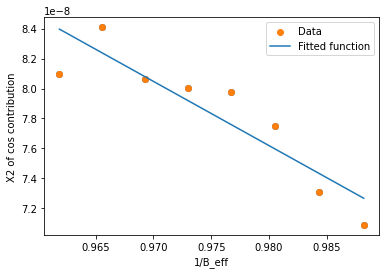

In [20]:

frac_B_eff_trim = np.asarray(frac_B_eff_trim)
x = frac_B_eff_trim
y = cos_factor_array_trim
plt.scatter(x, y)

from scipy import optimize

def test_func(x, a, b):
    return a * x + b

params, params_covariance = optimize.curve_fit(test_func, x, y)

print(f'Gradient of line is {params[0]}')
print(f'y-intercept is {params[1]}')
    
plt.scatter(x, y, label='Data')
plt.plot(x, test_func(x, params[0], params[1]),
         label='Fitted function')

plt.xlabel('1/B_eff')
plt.ylabel('X2 of cos contribution')
    
plt.legend(loc='best')

plt.show()



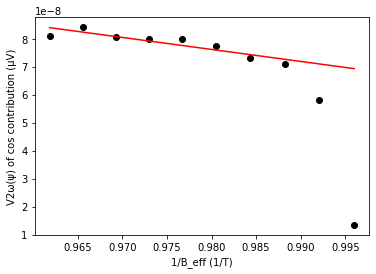

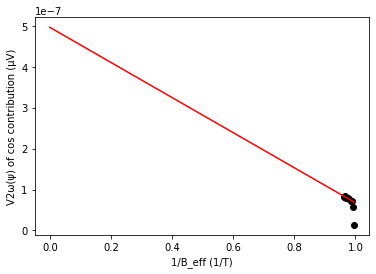

In [21]:
plt.scatter(frac_B_eff, cos_factor_array, color='black')

x = np.linspace(min(frac_B_eff), max(frac_B_eff), len(frac_B_eff))
y = params[0] * x + params[1]
plt.plot(x, y, color='red')
plt.xlabel('1/B_eff (1/T)')
plt.ylabel('V2ω(ψ) of cos contribution (μV)')
plt.show()

x = np.linspace(0, max(frac_B_eff))
y = params[0] * x + params[1]
plt.plot(x, y, color='red')
plt.scatter(frac_B_eff, cos_factor_array, color='black')
plt.xlabel('1/B_eff (1/T)')
plt.ylabel('V2ω(ψ) of cos contribution (μV)')
plt.show()

In [22]:
#Dimensions
py_thickness = 20 * 10**-9
pt_thickness = 5 * 10**-9

#two dif samples... choose correct
small_pypt_width = 0.4 * 10**-3
big_pypt_width = 0.7 * 10**-3
small_pypt_length = 2.2 * 10**-3 
big_pypt_length = 7 * 10**-3

#use big
rho_AHE = 0.02 * 10**-6
R_AHE = rho_AHE * (big_pypt_length/(big_pypt_width*(py_thickness+pt_thickness)))

print(R_AHE)

current = df_1[i_source][0] * 10**-3  #Amps
I_rms = 0.7 * current                 #Amps


B_DL = -(2 * params[0]) / (R_AHE * I_rms)

magnetothermal = params[1] / (current * I_rms)

print(f'B_DL = {B_DL}')
print(f'magnetothermal = {magnetothermal}')

8.000000000000002
B_DL = 1.0211786960020613e-05
magnetothermal = 0.0031524025151124973


### Now plot external field dependence of cos contirbution 

Can be seen in interplay paper

In [23]:
if cos_factor_array[0] < 0:
    peak_cos_contribution = min(cos_factor_array)
elif cos_factor_array[0] >0:
    peak_cos_contribution = max(cos_factor_array)

[0.15937712959783518, 0.6900525723932283, 0.8429375315386324, 0.8694718066912734, 0.9212882111906193, 0.9483018079498621, 0.9514945380864602, 0.9588336707105941, 1.0, 0.9628661332092548]


Text(0, 0.5, 'cos contribution (normalised)')

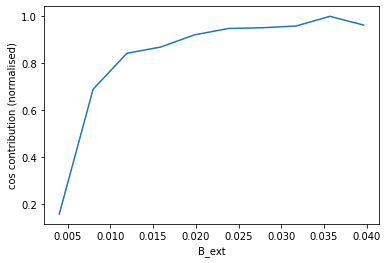

In [24]:
norm_cos_factor_array = [x/peak_cos_contribution for x in cos_factor_array]
print(norm_cos_factor_array)

plt.plot(B_ext, norm_cos_factor_array)
plt.xlabel('B_ext')
plt.ylabel('cos contribution (normalised)')

## Now find FL contribution as eqn as opposed to values

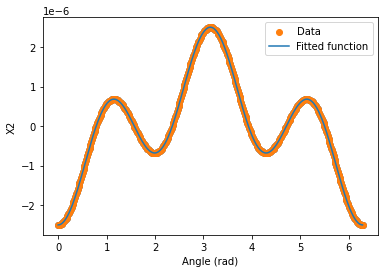

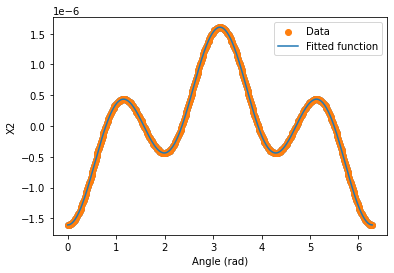

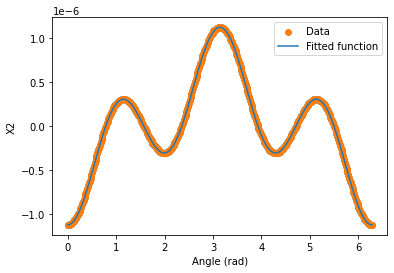

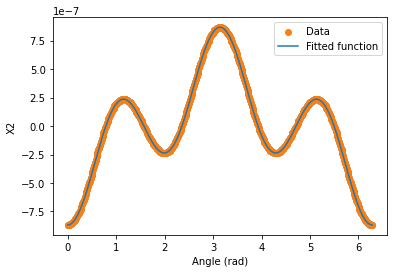

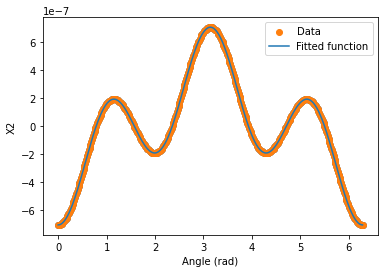

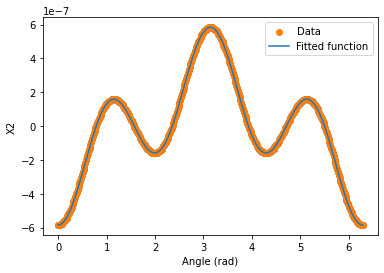

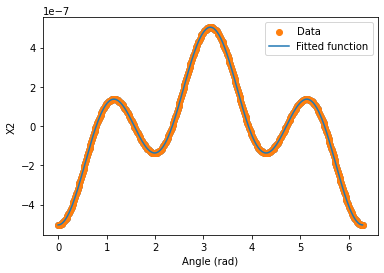

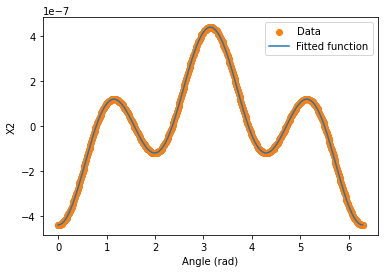

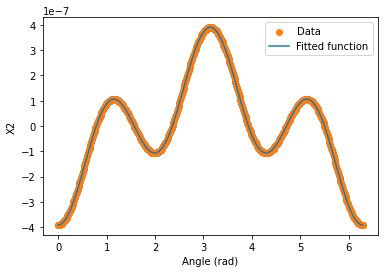

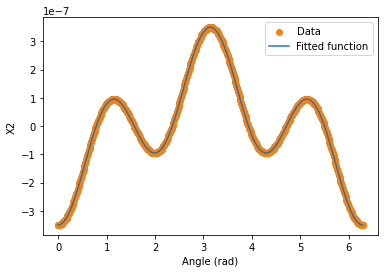

In [25]:
FL_factor_array = np.zeros(number_of_dataframes)

x = np.linspace(0, 2*np.pi, 360)

for i in range(number_of_dataframes):
    from scipy import optimize
    plt.scatter(x, FL[i])

    def test_func(x, a):
        return a * (2*np.cos(x)*np.cos(x)*np.cos(x) - np.cos(x))

    params, params_covariance = optimize.curve_fit(test_func, x, FL[i])

    FL_factor_array[i] = params[0] 

    plt.scatter(x, FL[i], label='Data')
    plt.plot(x, test_func(x, params[0]),
             label='Fitted function')
    
    plt.xlabel('Angle (rad)')
    plt.ylabel('X2')


    plt.legend(loc='best')

    plt.show()


### Plot external field dependence of FL contribution

In [26]:
if FL_factor_array[0] < 0:
    FL_factor_array = [-1 * x for x in FL_factor_array]

#FL_factor_array = [x*10**6 for x in FL_factor_array]
peak_FL_contribution = max(FL_factor_array)
print(f'FL factor array: \n{FL_factor_array}')
print(f'Peak FL contribution value {peak_FL_contribution}')

FL factor array: 
[2.499234319623551e-06, 1.6049927522290583e-06, 1.121962046083802e-06, 8.67887702923385e-07, 7.062003198673931e-07, 5.845120865528969e-07, 5.040359261478187e-07, 4.391585217048524e-07, 3.9088266999534467e-07, 3.4996558335233915e-07]
Peak FL contribution value 2.499234319623551e-06


[1.0, 0.6421937869638455, 0.4489223108351034, 0.34726143767668455, 0.2825666702487364, 0.2338764644689016, 0.20167613824370798, 0.17571722597463407, 0.15640096925934566, 0.1400291203607723]


Text(0, 0.5, 'FL contribution (normalised)')

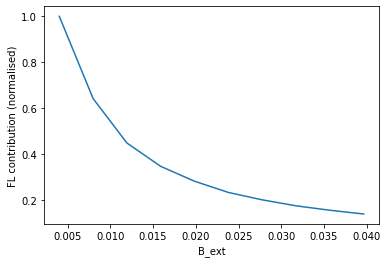

In [27]:
norm_FL_factor_array = [x/peak_FL_contribution for x in FL_factor_array]
print(norm_FL_factor_array)

plt.plot(B_ext, norm_FL_factor_array)
plt.xlabel('B_ext')
plt.ylabel('FL contribution (normalised)')

#### Plot 1/Bext with FL contribution

Text(0, 0.5, 'X2 of FL contribution')

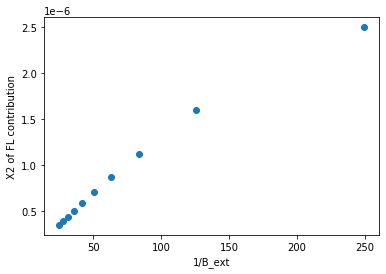

In [28]:
plt.scatter(frac_B_ext, FL_factor_array)
plt.xlabel('1/B_ext')
plt.ylabel('X2 of FL contribution')

9.759510907207331e-09
1.900497028259939e-07


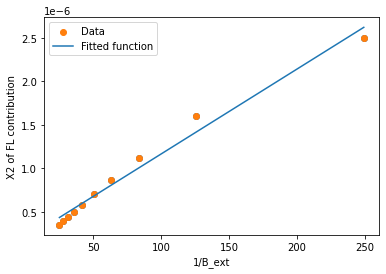

In [29]:
#Apply straight line fit through all data

frac_B_ext = np.asarray(frac_B_ext)
x = frac_B_ext
y = FL_factor_array
plt.scatter(x, y)


from scipy import optimize

def test_func(x, a, b):
    return a * x + b

params, params_covariance = optimize.curve_fit(test_func, x, y)

print(params[0])
print(params[1])
    
plt.scatter(x, y, label='Data')
plt.plot(x, test_func(x, params[0], params[1]),
         label='Fitted function')

plt.xlabel('1/B_ext')
plt.ylabel('X2 of FL contribution')

    
plt.legend(loc='best')

plt.show()



### Now select the range of data you want to fit to be applied to

In [30]:
#The delete array should include the element number of each value to be deleted,
#acknowledge that after each element gets deleted all elements to the right shift -1.
#If you want to delete the first 3 elements ie. 1, 2, 3 you would need to input 0, 0, 0

delete_array = [0, 0]

frac_B_ext = frac_B_ext.tolist()

frac_B_ext_trim = np.zeros(len(frac_B_ext)).tolist()
FL_factor_array_trim = np.zeros(len(FL_factor_array)).tolist()

for i in range(len(frac_B_ext)):
    frac_B_ext_trim[i] = frac_B_ext[i]
    FL_factor_array_trim[i] = FL_factor_array[i]

for i in range(len(delete_array)):
    frac_B_ext_trim.pop(delete_array[i])
    FL_factor_array_trim.pop(delete_array[i])

print('trimmed')
print(frac_B_ext_trim)
print(FL_factor_array_trim)

trimmed
[83.80278918174922, 62.92085985849344, 50.36975433624167, 41.99318565123751, 36.00542699981507, 31.512147216566824, 28.015914737505135, 25.21800886789645]
[1.121962046083802e-06, 8.67887702923385e-07, 7.062003198673931e-07, 5.845120865528969e-07, 5.040359261478187e-07, 4.391585217048524e-07, 3.9088266999534467e-07, 3.4996558335233915e-07]


In [31]:
print('array sizes \n')
print('trimmed:')
print(len(FL_factor_array_trim))
print(len(frac_B_ext_trim))
print('old:')
print(len(frac_B_ext))

array sizes 

trimmed:
8
8
old:
10


Gradient of line is 1.3252942787899785e-08
y-intercept is 2.4461410266626836e-08


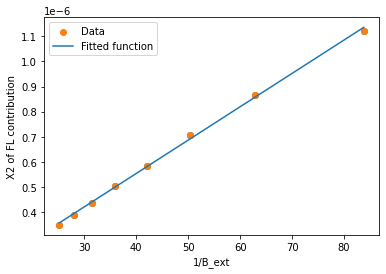

In [32]:

frac_B_ext_trim = np.asarray(frac_B_ext_trim)
x = frac_B_ext_trim
y = FL_factor_array_trim
plt.scatter(x, y)

from scipy import optimize

def test_func(x, a, b):
    return a * x + b

params, params_covariance = optimize.curve_fit(test_func, x, y)

print(f'Gradient of line is {params[0]}')
print(f'y-intercept is {params[1]}')
    
plt.scatter(x, y, label='Data')
plt.plot(x, test_func(x, params[0], params[1]),
         label='Fitted function')

plt.xlabel('1/B_ext')
plt.ylabel('X2 of FL contribution')
    
plt.legend(loc='best')

plt.show()



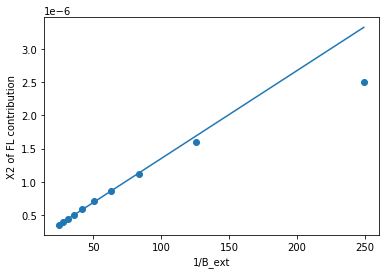

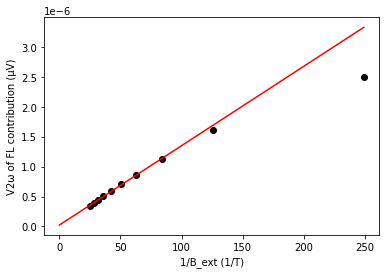

In [33]:
plt.scatter(frac_B_ext, FL_factor_array)

x = np.linspace(min(frac_B_ext), max(frac_B_ext), len(frac_B_ext))
y = params[0] * x + params[1]
plt.plot(x, y)
plt.xlabel('1/B_ext')
plt.ylabel('X2 of FL contribution')
plt.show()

x = np.linspace(0, max(frac_B_ext))
y = params[0] * x + params[1]
plt.plot(x, y, color='red')
plt.scatter(frac_B_ext, FL_factor_array, color='black')
plt.xlabel('1/B_ext (1/T)')
plt.ylabel('V2ω of FL contribution (μV)')
plt.show()

In [34]:
R_PHE_avg = sum(R_PHE_array)/len(R_PHE_array)
print(f'R_PHE avg = {R_PHE_avg}')



B_FL = -(params[0]/(R_PHE_avg*I_rms))
print(f'B_FL = {B_FL}')

print(f'y-intercept is {params[1]}')


R_PHE avg = 0.08371929400284162
B_FL = -1.5076393589465601e-05
y-intercept is 2.4461410266626836e-08


# SECTION 5

## Spin Hall angle

In [35]:
#Dimensions

py_thickness = 20 * 10**-9
pt_thickness = 5 * 10**-9

#two dif samples... choose correct
small_pypt_width = 0.4 * 10**-3
big_pypt_width = 0.7 * 10**-3

current = df_1[i_source][0] * 10**-3
I_rms = 0.7 * current


In [36]:
e = 1.6*10**-19
hbar = 1.05 * 10**-34
Ms = 1 / (4 *np.pi * 10**-7)
j_pypt_0 = (I_rms) / ((pt_thickness) * big_pypt_width)
print(I_rms)
print(j_pypt_0)

0.010499999999999999
2999999999.9999995


In [37]:
SH_angle = (2*e / hbar) * ((B_DL * Ms * py_thickness)/(j_pypt_0))
print(SH_angle)

0.16510540926868725
